<a href="https://colab.research.google.com/github/AJ-Benjamin/Bitcoin_time_series_forecast_project/blob/main/Bitcoin_time_series_forecast_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Objective/Aim
* We're going to be building a series of models in an attempt to predict the price of Bitcoin.

Downloading BTC-USD historical data from Yahoo finance via Kaggle between 2014 to 2024.

Link: https://www.kaggle.com/datasets/kannapat/btc-usd-historical-price-2014-2024?resource=download

In [1]:
# Downloading Bitcoin historical data from Kaggle
import kagglehub

# Download lamtest version
path = kagglehub.dataset_download("kannapat/btc-usd-historical-price-2014-2024")

print("Path to dataset files:", path)

100%|██████████| 97.9k/97.9k [00:00<00:00, 34.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/kannapat/btc-usd-historical-price-2014-2024/versions/1


In [2]:
# Exploring the path/directory
import os

print("Files in dataset folder:", os.listdir(path))

Files in dataset folder: ['BTC-USD.csv']


In [3]:
# Read into the file (parse dates and set date column to index)
import pandas as pd

file_path = os.path.join(path, "BTC-USD.csv")
df = pd.read_csv(file_path,
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3440 entries, 2014-09-17 to 2024-02-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3440 non-null   float64
 1   High       3440 non-null   float64
 2   Low        3440 non-null   float64
 3   Close      3440 non-null   float64
 4   Adj Close  3440 non-null   float64
 5   Volume     3440 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 188.1 KB


In [5]:
len(df)

3440

In [6]:
# We only need price (close) and volume. Pick the two and rename column "Close" to "Price"
bitcoin_prices = pd.DataFrame()

bitcoin_prices = df.loc[:, ["Close"]]
bitcoin_prices.rename(columns={"Close": "Price"}, inplace=True)


# bitcoin_prices = df.loc[:, ["Close", "Volume"]]
# bitcoin_prices.rename(columns={"Close": "Price"}, inplace=True)

bitcoin_prices

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2024-02-12,49958.222656
2024-02-13,49742.441406
2024-02-14,51826.695313


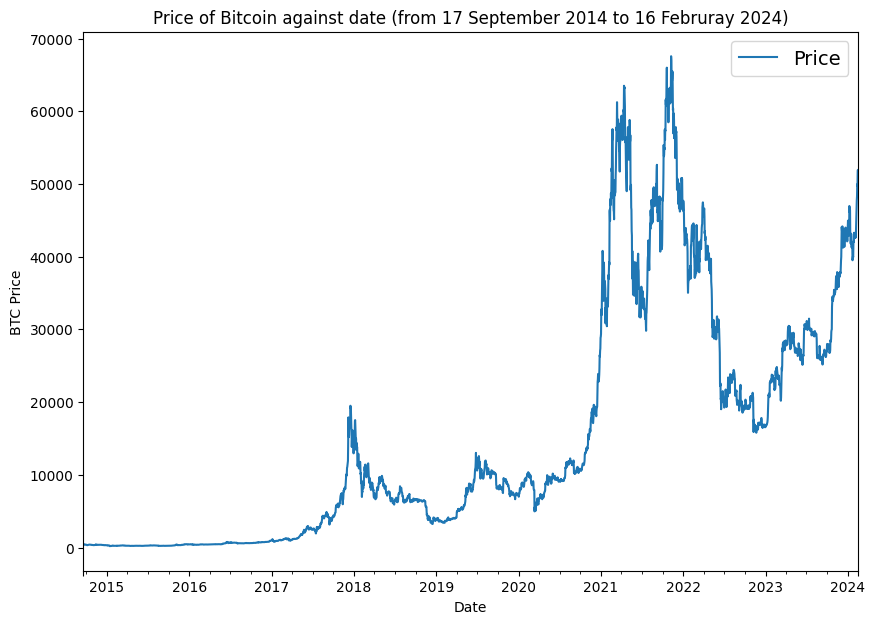

In [7]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(y=["Price"], figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin against date (from 17 September 2014 to 16 Februray 2024)")
plt.legend(fontsize=14)

# bitcoin_prices.plot(y="Volume", figsize=(10, 7))
# plt.ylabel("Volume traded")
# plt.title("Volume of Bitcoin traded against date (from 17 September 2014 to 16 Februray 2024)")
# plt.legend(fontsize=14)
# plt.show()


In [8]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

# file_path = "your_file.csv"  # Replace with your actual file path

timesteps = []
btc_price = []

with open(file_path, "r") as f:
    csv_reader = csv.reader(f, delimiter=",")

    # Read and print the header to verify column order
    header = next(csv_reader)
    # print("CSV Header:", header)

    for line in csv_reader:
        try:
            # Adjust column indices based on actual CSV structure
            date = datetime.strptime(line[0], "%Y-%m-%d")  # Change index if needed
            price = float(line[1])  # Change index if needed

            timesteps.append(date)
            btc_price.append(price)
        except ValueError as e:
            print(f"Skipping row {line}: {e}")

# Print first 10 values to verify
# print("First 10 timestamps:", timesteps[:10])
# print("First 10 BTC prices:", btc_price[:10])

timesteps[:10], btc_price[:10]

([datetime.datetime(2014, 9, 17, 0, 0),
  datetime.datetime(2014, 9, 18, 0, 0),
  datetime.datetime(2014, 9, 19, 0, 0),
  datetime.datetime(2014, 9, 20, 0, 0),
  datetime.datetime(2014, 9, 21, 0, 0),
  datetime.datetime(2014, 9, 22, 0, 0),
  datetime.datetime(2014, 9, 23, 0, 0),
  datetime.datetime(2014, 9, 24, 0, 0),
  datetime.datetime(2014, 9, 25, 0, 0),
  datetime.datetime(2014, 9, 26, 0, 0)],
 [465.864014,
  456.859985,
  424.102997,
  394.673004,
  408.084991,
  399.100006,
  402.09201,
  435.751007,
  423.156006,
  411.428986])

### Creating train and test set for time series data

In [9]:
"""
This will a univariate project, we will be using the price of Bitcoin to predict the price of Bitcoin
"""

'\nThis will a univariate project, we will be using the price of Bitcoin to predict the price of Bitcoin\n'

In [10]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2014-09-17T00:00:00.000000000', '2014-09-18T00:00:00.000000000',
        '2014-09-19T00:00:00.000000000', '2014-09-20T00:00:00.000000000',
        '2014-09-21T00:00:00.000000000', '2014-09-22T00:00:00.000000000',
        '2014-09-23T00:00:00.000000000', '2014-09-24T00:00:00.000000000',
        '2014-09-25T00:00:00.000000000', '2014-09-26T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
        402.152008, 435.790985, 423.204987, 411.574005, 404.424988]))

In [11]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2752, 688, 2752, 688)

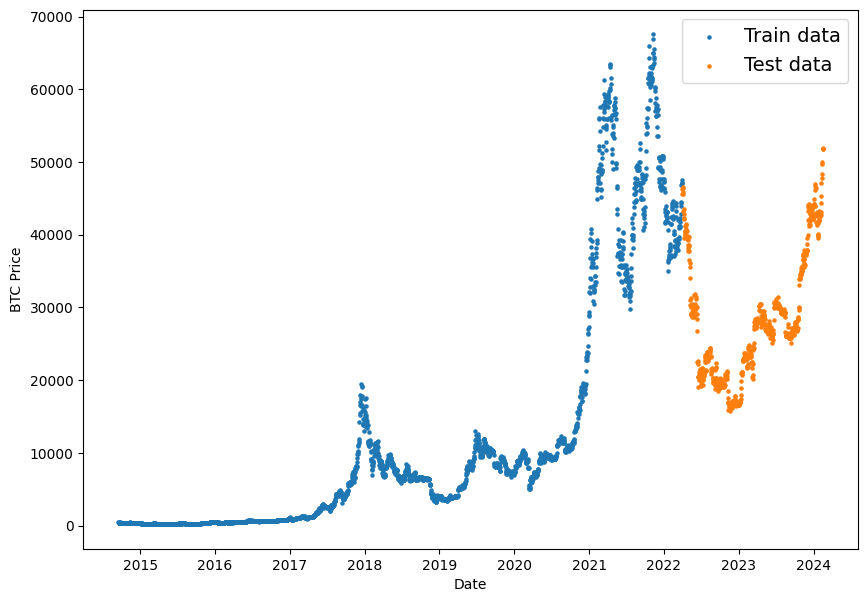

In [12]:

# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

### Create a plotting function

In [13]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

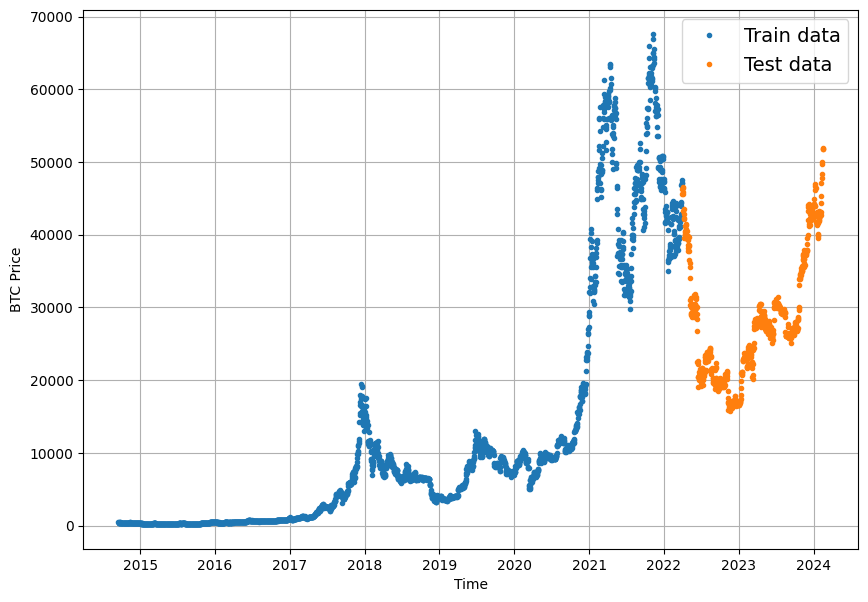

In [14]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

### Modelling Experiments

### Model 0: Naive forecast (baseline)

In [15]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10

(array([45538.675781, 46281.644531, 45868.949219, 46453.566406,
        46622.675781, 45555.992188, 43206.738281, 43503.847656,
        42287.664063, 42782.136719]),
 array([43084.671875, 44318.222656, 45301.566406, 47147.199219,
        47771.277344, 48293.917969, 49958.222656, 49742.441406,
        51826.695313, 51938.554688]))

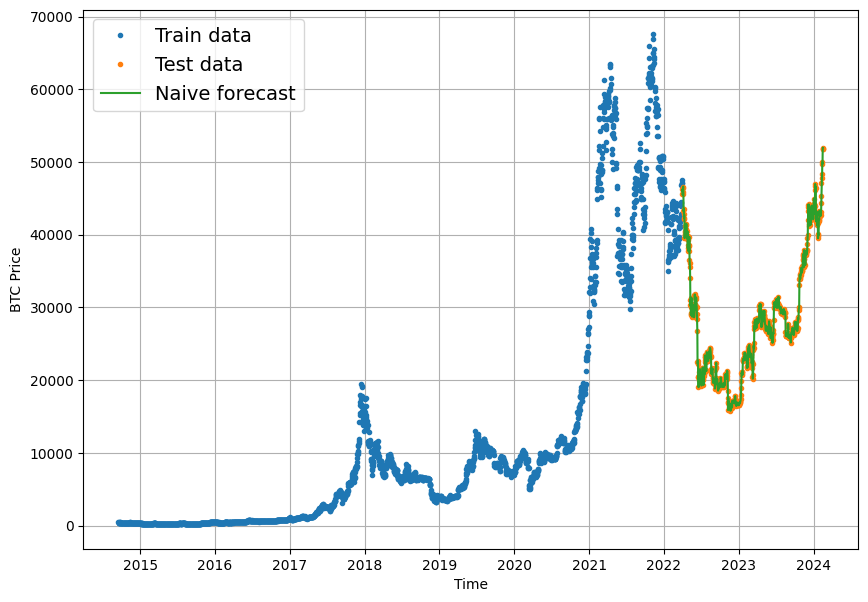

In [16]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");


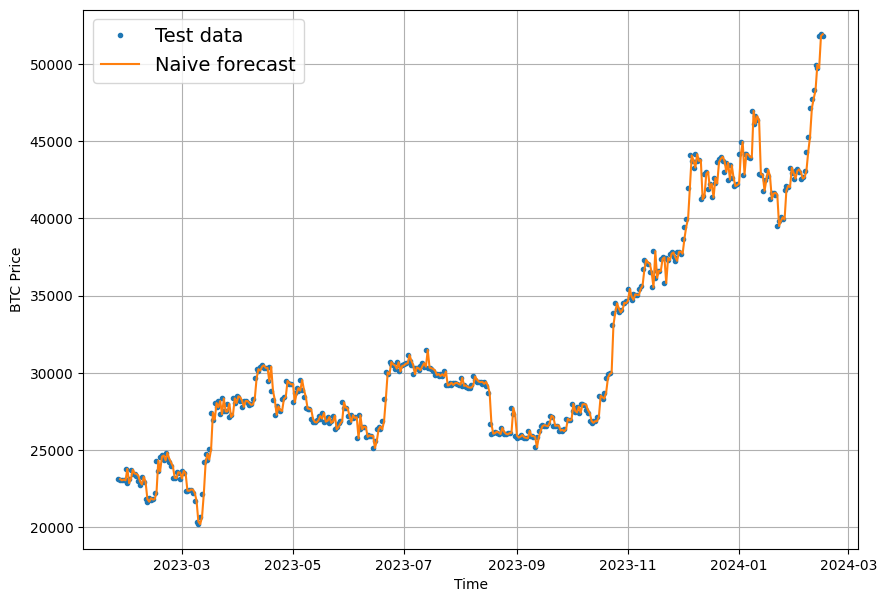

In [17]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");


### Evaluating a time series model

In [18]:
# Let's get TensorFlow!
import tensorflow as tf

In [19]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [20]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Instantiate metric objects
  mae_metric = tf.keras.metrics.MeanAbsoluteError()
  mse_metric = tf.keras.metrics.MeanSquaredError()
  mape_metric = tf.keras.metrics.MeanAbsolutePercentageError()

  # Update metrics with predictions and true values
  mae_metric.update_state(y_true, y_pred)
  mse_metric.update_state(y_true, y_pred)
  mape_metric.update_state(y_true, y_pred)

  # Retrieve results
  mae = mae_metric.result().numpy()
  mse = mse_metric.result().numpy()
  rmse = tf.sqrt(mse).numpy()
  mape = mape_metric.result().numpy()
  mase = mean_absolute_scaled_error(y_true, y_pred).numpy()  # Assuming this is defined

  return {
      "mae": mae,
      "mse": mse,
      "rmse": rmse,
      "mape": mape,
      "mase": mase
  }

In [21]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 505.51398,
 'mse': 602696.9,
 'rmse': 776.3356,
 'mape': 1.8199339,
 'mase': 1.0006852}

In [22]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 505.51398,
 'mse': 602696.9,
 'rmse': 776.3356,
 'mape': 1.8199339,
 'mase': 1.0006852}

In [23]:
# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

27951.69731395349

### Format Data Part 2: windowing our dataset

In [24]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [25]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [26]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [27]:
import numpy as np
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3433, 3433)

In [28]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [457.334015 424.440002 394.79599  408.903992 398.821014 402.152008
 435.790985] -> Label: [423.204987]
Window: [424.440002 394.79599  408.903992 398.821014 402.152008 435.790985
 423.204987] -> Label: [411.574005]
Window: [394.79599  408.903992 398.821014 402.152008 435.790985 423.204987
 411.574005] -> Label: [404.424988]


In [29]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [44318.222656 45301.566406 47147.199219 47771.277344 48293.917969
 49958.222656 49742.441406] -> Label: [51826.695313]
Window: [45301.566406 47147.199219 47771.277344 48293.917969 49958.222656
 49742.441406 51826.695313] -> Label: [51938.554688]
Window: [47147.199219 47771.277344 48293.917969 49958.222656 49742.441406
 51826.695313 51938.554688] -> Label: [51841.0625]


### Turning windows into training and test sets

In [30]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [31]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)


(2746, 687, 2746, 687)

In [32]:
train_windows[:5], train_labels[:5]

(array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
         402.152008, 435.790985],
        [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
         435.790985, 423.204987],
        [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
         423.204987, 411.574005],
        [408.903992, 398.821014, 402.152008, 435.790985, 423.204987,
         411.574005, 404.424988],
        [398.821014, 402.152008, 435.790985, 423.204987, 411.574005,
         404.424988, 399.519989]]),
 array([[423.204987],
        [411.574005],
        [404.424988],
        [399.519989],
        [377.181   ]]))

In [33]:
# # Check to see if same (accounting for horizon and window size)
# np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

### Make a modelling checkpoint

In [34]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name + ".keras"), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file


### Model 1: Dense model (window = 7, horizon = 1)

In [35]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 6389.7300 - mae: 6389.7300 - val_loss: 3721.6284 - val_mae: 3721.6284
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 921.8269 - mae: 921.8269 - val_loss: 1124.9509 - val_mae: 1124.9509
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 582.5967 - mae: 582.5967 - val_loss: 868.7660 - val_mae: 868.7660
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 536.7066 - mae: 536.7066 - val_loss: 881.4827 - val_mae: 881.4827
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 536.3744 - mae: 536.3744 - val_loss: 828.9294 - val_mae: 828.9294
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 491.2332 - mae: 491.2332 - val_loss: 917.2004 - val_mae: 917.2004
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 489.4659 - mae: 489.4659 - val_loss: 900.0816 - val_mae: 900.0816
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 472.8377 - mae: 472.8377 - val_loss: 850.6492 - val_mae: 

In [36]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 643.4800 - mae: 643.4800 


[607.9638671875, 607.9638671875]

In [37]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense.keras")
model_1.evaluate(test_windows, test_labels)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 582.1213 - mae: 582.1213  


[505.05780029296875, 505.05780029296875]

### Making forecasts with a model (on the test dataset)

In [38]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [39]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


(687,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([45757.117, 46176.723, 45895.508, 46335.734, 46562.086, 45670.594,
        43441.023, 43410.727, 42371.875, 42620.883], dtype=float32)>)

In [40]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 505.05786,
 'mse': 603179.8,
 'rmse': 776.64655,
 'mape': 1.8233182,
 'mase': 0.9997823}

In [41]:
naive_results

{'mae': 505.51398,
 'mse': 602696.9,
 'rmse': 776.3356,
 'mape': 1.8199339,
 'mase': 1.0006852}

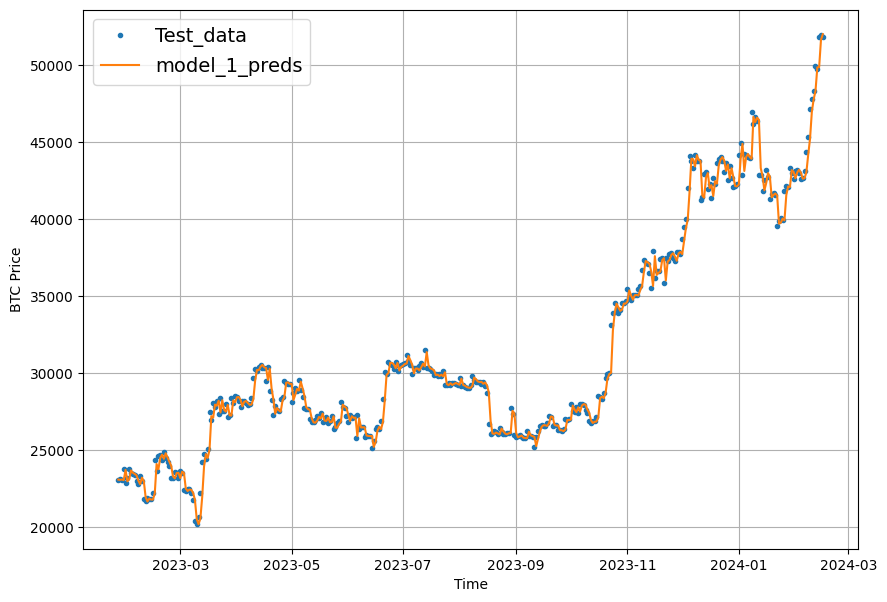

In [42]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

### Model 2: Dense (window = 30, horizon = 1)

In [43]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

In [44]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3410, 3410)

In [45]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)


(2728, 682, 2728, 682)

In [46]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])


In [47]:
# Evaluate model 2 preds
model_2.evaluate(test_windows, test_labels)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 823.6844  


725.1970825195312

In [48]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense.keras")
model_2.evaluate(test_windows, test_labels)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 620.3354  


532.1845703125

In [49]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [50]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 532.1846,
 'mse': 650047.06,
 'rmse': 806.25494,
 'mape': 1.9388673,
 'mase': 1.0598162}

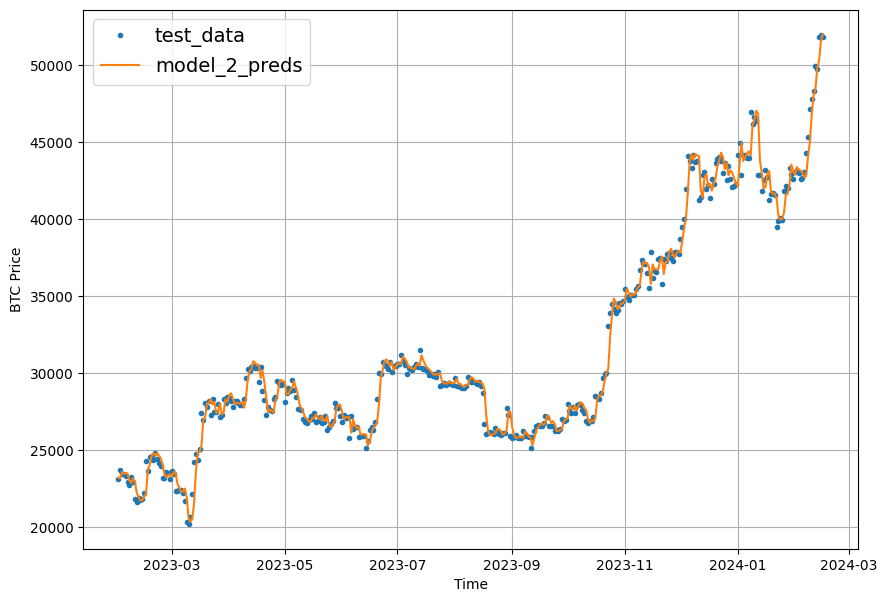

In [51]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")


### Model 3: Dense (window = 30, horizon = 7)

In [52]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3404, 3404)

In [53]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)


(2723, 681, 2723, 681)

In [54]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [55]:
# Evaluate model 3
model_3.evaluate(test_windows, test_labels)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1305.1898 


1143.0003662109375

In [56]:
# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense.keras")
model_3.evaluate(test_windows, test_labels)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1305.1898  


1143.0003662109375

In [57]:
# The predicitons are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[46083.43 , 47284.258, 45867.98 , 47183.867, 47746.887, 46318.426,
        48147.465],
       [46476.977, 46858.9  , 46927.1  , 47192.516, 47196.402, 47292.387,
        48026.543],
       [46254.387, 47046.082, 46240.684, 47312.75 , 46585.605, 46156.816,
        47803.332],
       [46665.21 , 47071.504, 46460.676, 46946.562, 46977.14 , 46621.547,
        47658.76 ],
       [46742.164, 47267.184, 47311.574, 47269.92 , 47207.824, 46519.3  ,
        47806.457]], dtype=float32)>

In [58]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1143.0002,
 'mse': 3015434.2,
 'rmse': 1736.5006,
 'mape': 4.189782,
 'mase': 2.2692533}

In [59]:
naive_results

{'mae': 505.51398,
 'mse': 602696.9,
 'rmse': 776.3356,
 'mape': 1.8199339,
 'mase': 1.0006852}

### Visualize Model 3

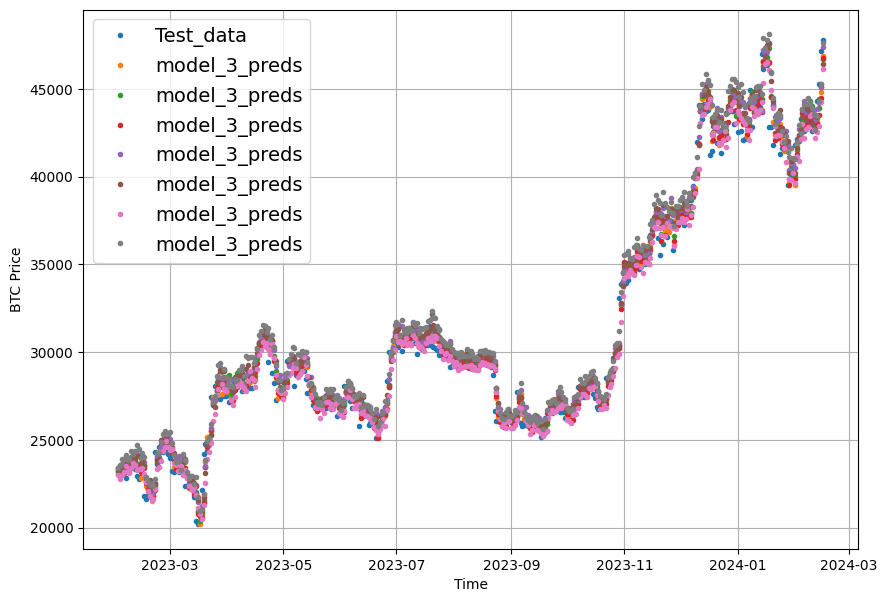

In [60]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

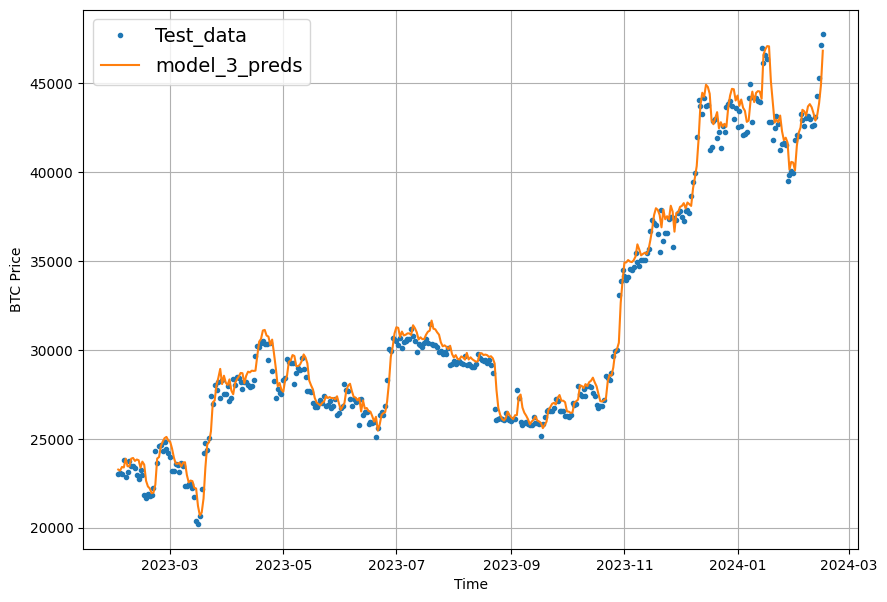

In [61]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format="-",
                 start=offset,
                 label="model_3_preds")


### Which of our model is performing best so far?

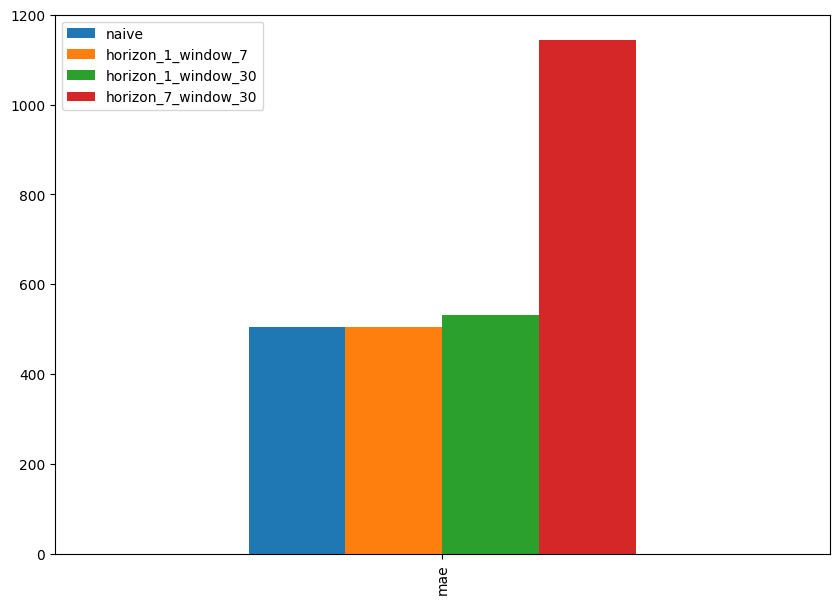

In [62]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]},  index=["mae"]).plot(figsize=(10, 7), kind="bar");



### Model 4: Conv1D

In [63]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # Use previous week worth of data

In [64]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3433, 3433)

In [65]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2746, 687, 2746, 687)

In [66]:
# Check data sample shapes
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [67]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))  # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE,input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[457.334]
 [424.44 ]
 [394.796]
 [408.904]
 [398.821]
 [402.152]
 [435.791]]


In [68]:
from tensorflow import keras
from tensorflow.keras import layers

tf.random.set_seed(42)

# Define the function for expanding dimensions
def expand_dims_layer(x):
    return tf.expand_dims(x, axis=1)

# Create model
model_4 = keras.Sequential([
    layers.Lambda(expand_dims_layer),  # Use named function
    layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae", optimizer=keras.optimizers.Adam())

# Train the model
model_4.fit(train_windows, train_labels, batch_size=128, epochs=100, verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

# Save the model
model_4.save("model_experiments/model_4_conv1D.keras")



In [69]:
model_4.summary()

Model: "model_4_conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)                    │ (None, 1, 7)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 1, 128)              │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1, 1)                │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,213 (55.52 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,476 (37.02 KB)

In [70]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4 = keras.models.load_model(
    "model_experiments/model_4_conv1D.keras",
    custom_objects={"expand_dims_layer": expand_dims_layer}  # Use function name
)

# Evaluate
model_4.evaluate(test_windows, test_labels)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 676.4299


659.7318115234375

In [71]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([45574.09 , 45434.26 , 45179.875, 45541.402, 45816.117, 45270.06 ,
       43369.52 , 42652.48 , 41741.543, 41766.297], dtype=float32)>

In [72]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 659.7318,
 'mse': 819848.7,
 'rmse': 905.45496,
 'mape': 2.3683627,
 'mase': 1.3059657}

### Model 5: RNN (LSTM)

In [73]:
tf.random.set_seed(42)

# Let's build an LSTM model with the functional API
inputs = layers.Input(shape=(WINDOW_SIZE,))
# x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)  # expand input dimension to be compatible with LSTM
# print(x.shape)
x = layers.Reshape((WINDOW_SIZE, 1))(inputs)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x)
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
# x = layers.Dense(32, activation="relu")(x))
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")


# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 6210.0649 - val_loss: 1713.7760
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 759.6828 - val_loss: 992.4973
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 600.3300 - val_loss: 1060.1108
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 628.0465 - val_loss: 1772.7311
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 841.4955 - val_loss: 1314.0726
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 674.6038 - val_loss: 1170.3920
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 634.5142 - val_loss: 950.5087
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 580.5779 - val_loss: 1143.0062
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 605.9331 - val_loss: 956.0005
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 618.6227 - val_loss: 983.5144
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 593.9810 - val_loss: 972.7155
E

In [74]:
# Load in best version of model 5 evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm.keras")
model_5.evaluate(test_windows, test_labels)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 675.8328


631.7741088867188

In [75]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([46346.33 , 45844.574, 45496.582, 45749.38 , 45969.332, 45782.535,
       44410.88 , 43254.816, 42317.445, 42092.47 ], dtype=float32)>

In [76]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 631.7741,
 'mse': 839091.8,
 'rmse': 916.01953,
 'mape': 2.2827384,
 'mase': 1.2506223}

In [77]:
naive_results

{'mae': 505.51398,
 'mse': 602696.9,
 'rmse': 776.3356,
 'mape': 1.8199339,
 'mase': 1.0006852}

### Make a multivariate time series

Since it's an open market, Let's consider if past event like `Bitcoin block reward size` add any predictive power to our model(s)

For context, the Bitcoin block reward size is the number of Bitcoin someone receives from mining a Bitcoin block.

At its inception, the Bitcoin block reward size was 50.

But every four years or so, the Bitcoin block reward halves.

For example, the block reward size went from 50 (starting January 2009) to 25 on November 28 2012.

Let's encode this information into our time series data and see if it helps a model's performance.

**Note:** Adding an extra feature to our dataset such as the Bitcoin block reward size will take our data from univariate (only the historical price of Bitcoin) to multivariate (the price of Bitcoin as well as the block reward size).


In [78]:
# Let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [79]:
# Block reward values
# block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
# block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020
# block_reward_5 = 3.125 # 19 April 2024

# Block reward dates (datetime form of the above date stamps)
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [80]:
block_reward_3_datetime

numpy.datetime64('2016-07-09')

In [81]:
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(661, 2070)

In [82]:
block_reward_3_datetime

numpy.datetime64('2016-07-09')

In [83]:
bitcoin_prices.index[0]

Timestamp('2014-09-17 00:00:00')

In [84]:
# Add in a block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_2_days:, -1] = block_reward_4

In [85]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2014-09-17,457.334015,12.5
2014-09-18,424.440002,12.5
2014-09-19,394.795990,12.5
2014-09-20,408.903992,12.5
2014-09-21,398.821014,12.5


In [86]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2024-02-12,49958.222656,6.25
2024-02-13,49742.441406,6.25
2024-02-14,51826.695313,6.25
2024-02-15,51938.554688,6.25
2024-02-16,51841.062500,6.25


<Axes: xlabel='Date'>

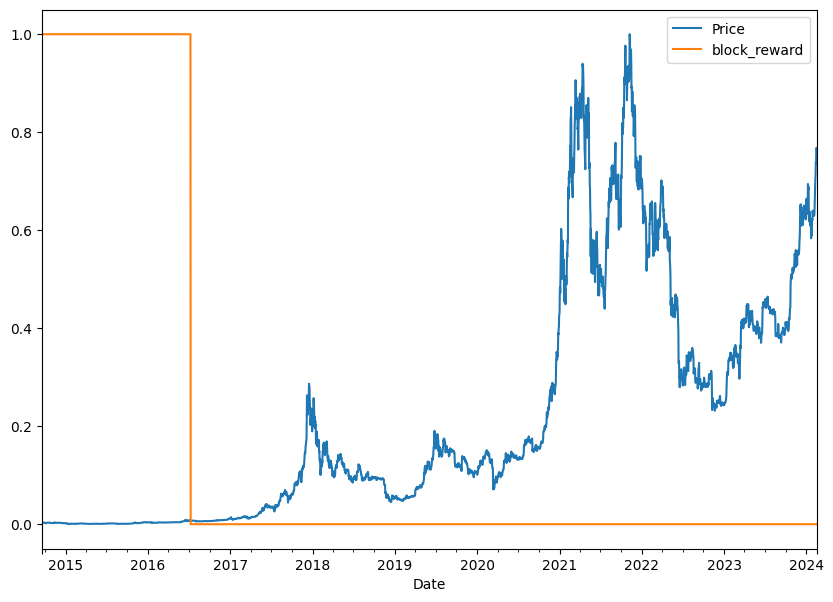

In [87]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale

# Scale only the "Price" and "block_reward" columns
scaled_data = minmax_scale(bitcoin_prices_block[["Price", "block_reward"]])

# Create DataFrame with only those two columns
scaled_price_block_df = pd.DataFrame(scaled_data,
                                     columns=["Price", "block_reward"],  # Only 2 columns
                                     index=bitcoin_prices_block.index)

# Plot the block reward/price over time
scaled_price_block_df.plot(figsize=(10, 7))


In [88]:
print(bitcoin_prices_block.shape)  # Should return something like (3440, 3)
print(bitcoin_prices_block.columns)  # Verify column names


(3440, 2)
Index(['Price', 'block_reward'], dtype='object')


### Making a windowed dataset with pandas with pandas

In [89]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7


In [90]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-09-17,457.334015,12.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,12.5,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,12.5,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,12.5,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,12.5,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN
2014-09-22,402.152008,12.5,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN
2014-09-23,435.790985,12.5,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015,NaN
2014-09-24,423.204987,12.5,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,411.574005,12.5,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002


In [91]:
# bitcoin_prices_windowed = bitcoin_prices_windowed.drop("Volume", axis=1)

In [92]:
# Let's create X & y, remove the NaN's and convert to  float32 to prevent TensorFlow errors
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-09-24,12.5,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,12.5,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002
2014-09-26,12.5,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990
2014-09-27,12.5,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992
2014-09-28,12.5,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014


In [93]:
# View labels
y.head()

,Price
Date,
2014-09-24,423.204987
2014-09-25,411.574005
2014-09-26,404.424988
2014-09-27,399.519989
2014-09-28,377.181000


In [94]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2746, 2746, 687, 687)

### Model 6: Dense (Multivariate time series)

In [95]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
    layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [96]:
# Make sure best model is loaded and evaluate data
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate.keras")
model_6.evaluate(X_test, y_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 581.1892  


507.18536376953125

In [97]:
# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([45552.258, 46183.832, 45782.055, 46324.438, 46510.29 , 45490.95 ,
       43343.184, 43316.96 , 42262.844, 42647.824], dtype=float32)>

In [98]:
# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 507.18536,
 'mse': 606577.6,
 'rmse': 778.83093,
 'mape': 1.8293536,
 'mase': 1.0039939}

In [99]:
model_1_results

{'mae': 505.05786,
 'mse': 603179.8,
 'rmse': 776.64655,
 'mape': 1.8233182,
 'mase': 0.9997823}

## Model 7: N-BEATS algorithm

### Building and testing an N-BEATS block layer

In [100]:
# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs  argument takes care of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [101]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [102]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [103]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.17786127  0.5770146   0.7780183  -0.6591073   0.7683449  -0.13623133
 -0.40945485]
Forecast: 0.047737106680870056


### Preparing data for the N-BEATS algorithm using `tf.data`

In [104]:
HORIZON = 1 # How far to predict forward
WINDOW_SIZE = 7 # how far to lookback

In [105]:
# Create NBEATS data inputs (NBEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [106]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-09-24,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002
2014-09-26,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990
2014-09-27,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992
2014-09-28,377.181000,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014


In [107]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make features and labels
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2746, 2746, 687, 687)

In [108]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features and labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Apppendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm

In [109]:
# N-BEATS paper: https://arxiv.org/pdf/1905.10437

In [110]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations"
N_NEURONS = 512 # called "Width"
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback"
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections

In [111]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Building, compiling and fitting the N-BEATS algorithm

In [112]:
""" Make sure to run this when on GPU, else comment out this cell.
Uncomment the next cell and run. Just know it will take sometime
"""

# %%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE,), name="stack_input")

# 3. Create initial backcast and forecast input (backward predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                          outputs=forecast,
                          name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


KeyboardInterrupt: 

In [ ]:
# # Setup TensorFlow random seed
# tf.random.set_seed(42)

# # 1. Setup N-BEATS Block layer
# nbeats_block_layer = NBeatsBlock(
#     input_size=INPUT_SIZE,
#     theta_size=THETA_SIZE,
#     horizon=HORIZON,
#     n_neurons=N_NEURONS,
#     n_layers=N_LAYERS,
#     name="InitialBlock"
# )

# # 2. Create input to stacks
# stack_input = tf.keras.layers.Input(shape=(INPUT_SIZE,), name="stack_input")

# # 3. First stack
# backcast, forecast = nbeats_block_layer(stack_input)
# residuals = tf.keras.layers.Subtract(name="subtract_00")([stack_input, backcast])

# # 4. Create multiple stack blocks
# for i in range(N_STACKS - 1):  # Start from 1 since first block is created above
#     block = NBeatsBlock(
#         input_size=INPUT_SIZE,
#         theta_size=THETA_SIZE,
#         horizon=HORIZON,
#         n_neurons=N_NEURONS,
#         n_layers=N_LAYERS,
#         name=f"NBeatsBlock_{i}"
#     )
#     backcast, block_forecast = block(residuals)
#     residuals = tf.keras.layers.Subtract(name=f"subtract_{i}")([residuals, backcast])
#     forecast = tf.keras.layers.Add(name=f"add_{i}")([forecast, block_forecast])

# # 5. Create model
# model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_N-BEATS")

# # 6. Compile model
# model_7.compile(
#     loss="mae",
#     optimizer=tf.keras.optimizers.Adam(0.001),
#     metrics=["mae", "mse"]
# )

# # 7. Fit model with callbacks
# model_7.fit(
#     train_dataset,
#     epochs=N_EPOCHS,
#     validation_data=test_dataset,
#     verbose=1,  # Show some training output
#     callbacks=[
#         tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
#         tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)
#     ]
# )


In [113]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step - loss: 1374.8619 - mae: 1374.8619 - mse: 2898154.2500


[1374.8619384765625, 1374.8619384765625, 2898154.25]

In [114]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([47764.914, 48117.008, 48342.617, 48738.406, 48728.805, 48018.9  ,
       46521.184, 46457.246, 45709.004, 45744.47 ], dtype=float32)>

In [115]:
# Evaluate N-BEATS model predictions
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 1374.8619,
 'mse': 2898154.5,
 'rmse': 1702.3967,
 'mape': 5.0904403,
 'mase': 2.7215946}

In [116]:
# model_7.save(model_7.name)

### Model 8: Creating an ensemble (stacking different models together)

### Constructing and fitting an ensemble of models (Using different loss functions)

In [117]:
def get_ensemble_models(horizon=HORIZON,
                       train_data=train_dataset,
                       test_data=test_dataset,
                       num_iter=10,
                       num_epochs=100,
                       loss_fns=["mae", "mse", "mape"]):
  # Make empty list for trained snsembled models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for  {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

    return ensemble_models # return list of trained models


In [118]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for  1000 epochs, model number: 0

Epoch 141: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 940: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for  1000 epochs, model number: 0

Epoch 858: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 958: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for  1000 epochs, model number: 0

Epoch 112: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 495: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 601: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 701: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
CPU times: user 2min 19s, sys: 7.35 s, total: 2min 26s
Wall time: 2min 8s


### Making predictions with an ensemble model

In [119]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [120]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


<tf.Tensor: shape=(3, 687), dtype=float32, numpy=
array([[45570.39 , 46199.473, 45796.777, ..., 49856.582, 51912.797,
        52001.004],
       [45517.973, 46409.05 , 45880.027, ..., 49910.36 , 52214.97 ,
        51932.516],
       [45463.82 , 46280.35 , 45683.09 , ..., 49786.883, 51994.703,
        51825.54 ]], dtype=float32)>

Rather than comparing every set of predictions to the ground truth, let's take the median


In [121]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 507.5756,
 'mse': 605996.3,
 'rmse': 778.45764,
 'mape': 1.8325186,
 'mase': 1.0047663}

In [122]:
naive_results

{'mae': 505.51398,
 'mse': 602696.9,
 'rmse': 776.3356,
 'mape': 1.8199339,
 'mase': 1.0006852}

### Plotting the prediction intervals (uncertainty estimates) of our ensemble

In [123]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds):
  std = tf.math.reduce_std(preds, axis=0)
  interval = 1.96 * std
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [124]:
# Get the upper and lower bounds of the 95% percent predict interval
lower, upper = get_upper_lower(preds=ensemble_preds)

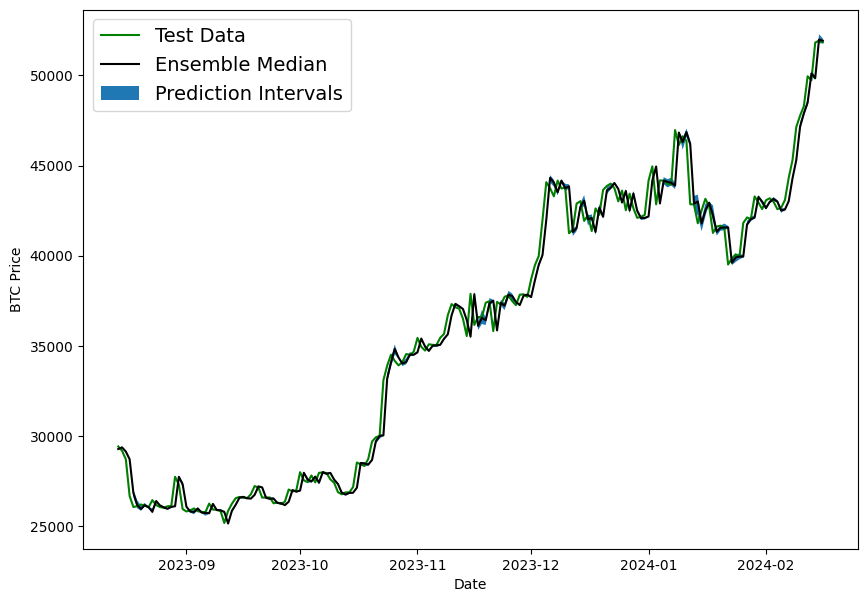

In [125]:
# Get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

### Model 9: Train a model on the full historical data to make predictions into future

In [126]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-09-17,457.334015,12.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,12.5,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,12.5,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,12.5,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,12.5,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN


In [127]:
# Train model on entire data to make prediction for the next day
X_all =  bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [128]:
# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [129]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0) # don't print out anything

### Make predictions on the future

In [130]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14 # Since our Bitcoin data is daily, this is 14 days

In [131]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:

  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(into_future):

    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # Print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [132]:
# Make forecasts into future of the price of Bitcoin
# Note: if you're reading this at a layer date, you may already be in the future, so the forecasts
# we're making may not actually be forecasts, if that's the case, readjust the training data.
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Predicting on: 
 [47771.277344 48293.917969 49958.222656 49742.441406 51826.695313
 51938.554688 51841.0625  ] -> Prediction: 48316.390625

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicting on: 
 [48293.917969 49958.222656 49742.441406 51826.695313 51938.554688
 51841.0625   48316.390625] -> Prediction: 49338.12109375

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicting on: 
 [49958.222656   49742.441406   51826.695313   51938.554688
 51841.0625     48316.390625   49338.12109375] -> Prediction: 50363.9453125

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicting on: 
 [49742.441406   51826.695313   51938.554688   51841.0625
 48316.390625   49338.12109375 50363.9453125 ] -> Prediction: 50783.92578125

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicting on: 
 [51826.695313   51938.554688   51841.0625     48316.390625
 49338.12109375 50363.9453125  50783.92578125] -> Prediction: 52037.546875

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicting on: 
 [51938.554688   

In [133]:
future_forecast[:10]

[48316.39,
 49338.12,
 50363.945,
 50783.926,
 52037.547,
 52018.34,
 50393.152,
 49087.05,
 50177.855,
 50860.95]

# Plot future forecasts

In [134]:
def get_future_dates(start_date, into_future, offset=1):
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date


In [135]:
# Last timestep of timesteps (currently in np.datatime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2024-02-16 00:00:00')

In [136]:
# Get  next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2024-02-17', '2024-02-18', '2024-02-19', '2024-02-20',
       '2024-02-21', '2024-02-22', '2024-02-23', '2024-02-24',
       '2024-02-25', '2024-02-26', '2024-02-27', '2024-02-28',
       '2024-02-29', '2024-03-01'], dtype='datetime64[D]')

In [137]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2024-02-16', '2024-02-17', '2024-02-18', '2024-02-19',
        '2024-02-20', '2024-02-21', '2024-02-22', '2024-02-23',
        '2024-02-24', '2024-02-25', '2024-02-26', '2024-02-27',
        '2024-02-28', '2024-02-29', '2024-03-01'], dtype='datetime64[D]'),
 array([51937.727, 48316.39 , 49338.12 , 50363.945, 50783.926, 52037.547,
        52018.34 , 50393.152, 49087.05 , 50177.855, 50860.95 , 51477.902,
        52182.344, 51433.137, 50020.656], dtype=float32))

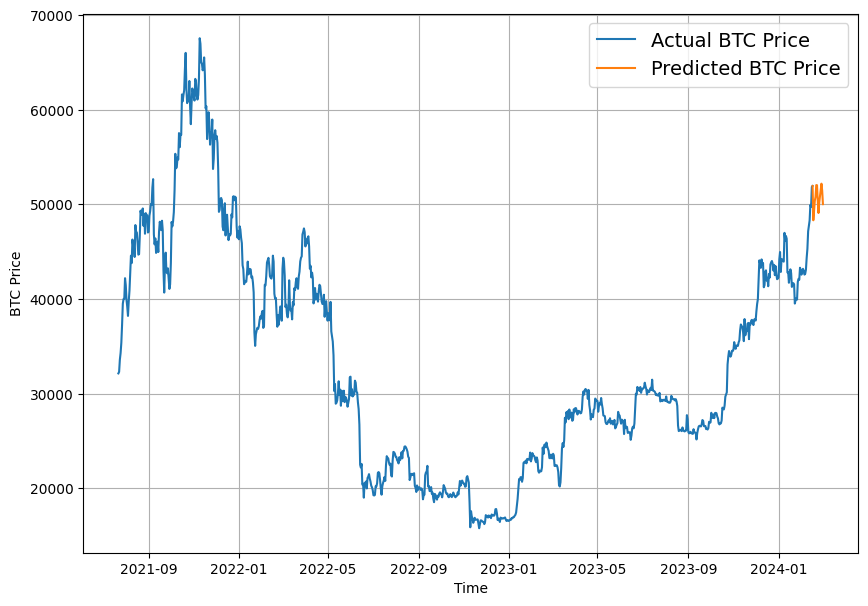

In [138]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")


### Model 10: Turkey Problem

In [139]:
# Let's introduce a Turkey problem to our BTC data (price BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100
# btc_price_turkey[-1]

In [140]:
# Manufacture an extra price on the end (to showcase the Turkey problem)
btc_price_turkey[-10:]

[43090.019531,
 44332.125,
 45297.382813,
 47153.527344,
 47768.96875,
 48296.386719,
 49941.359375,
 49733.445313,
 51836.785156,
 519.37726563]

In [141]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2024-02-07T00:00:00.000000000', '2024-02-08T00:00:00.000000000',
       '2024-02-09T00:00:00.000000000', '2024-02-10T00:00:00.000000000',
       '2024-02-11T00:00:00.000000000', '2024-02-12T00:00:00.000000000',
       '2024-02-13T00:00:00.000000000', '2024-02-14T00:00:00.000000000',
       '2024-02-15T00:00:00.000000000', '2024-02-16T00:00:00.000000000'],
      dtype='datetime64[ns]')

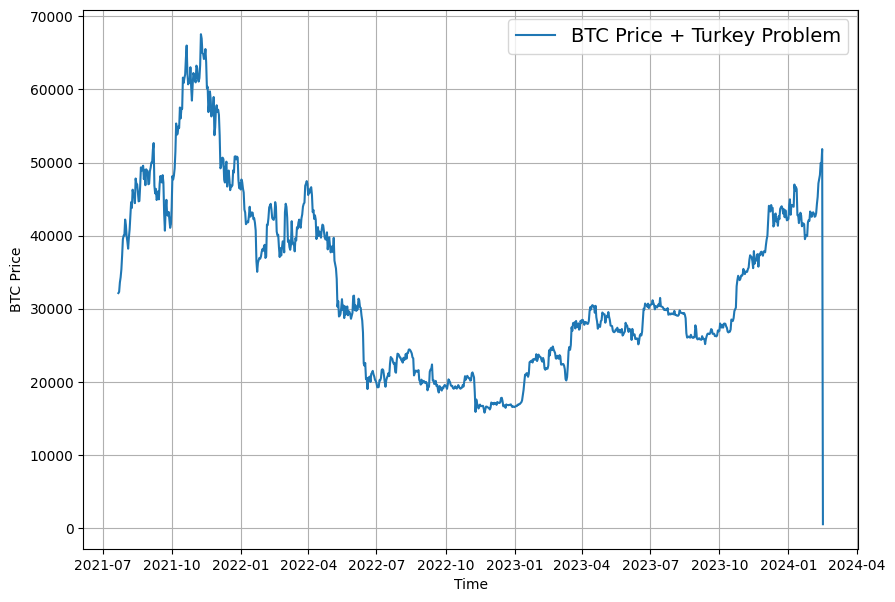

In [142]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey Problem",
                 start=2500)

In [143]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2746, 687, 2746, 687)

### Building a turkey model (model to predict on turkey data)

In [144]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model.name = "Turkey_Model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())

turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[tf.keras.callbacks.ModelCheckpoint(
                      filepath="model_experiments/Turkey_Model.keras",
                      save_best_only=True,
                      monitor="val_loss",
                      mode="min"
                  )])

In [145]:
# Evaluate turkey model on test data
turkey_model.evaluate(X_test, y_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 601.9872 


607.163330078125

In [146]:
# Load best model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/Turkey_Model.keras")
turkey_model.evaluate(X_test, y_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 592.1632  


582.7113647460938

In [147]:
# Make predictions with turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([47065.06 , 45611.43 , 46212.   , 45794.777, 46338.266, 46534.586,
       45520.355, 43396.688, 43346.223, 42283.4  ], dtype=float32)>

In [148]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 582.71136,
 'mse': 4416235.5,
 'rmse': 2101.4841,
 'mape': 16.16435,
 'mase': 15.685677}

In [149]:
model_1_results

{'mae': 505.05786,
 'mse': 603179.8,
 'rmse': 776.64655,
 'mape': 1.8233182,
 'mase': 0.9997823}

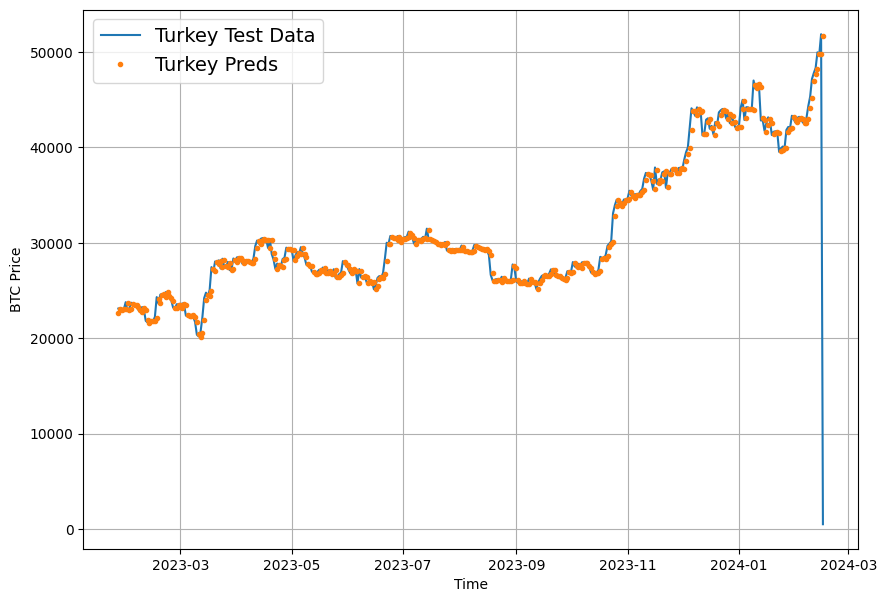

In [150]:
plt.figure(figsize=(10, 7))
# Plot_time_series(timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data", start=offset)

plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);

### Compare Models

In [151]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)


,mae,mse,rmse,mape,mase
naive_model,505.513977,6.026969e+05,776.335571,1.819934,1.000685
model_1_dense_w7_h1,505.057861,6.031798e+05,776.646545,1.823318,0.999782
model_2_dense_w30_h1,532.184570,6.500471e+05,806.254944,1.938867,1.059816
model_3_dense_w30_h7,1143.000244,3.015434e+06,1736.500610,4.189782,2.269253
model_4_CONV1D,659.731812,8.198487e+05,905.454956,2.368363,1.305966
model_5_LSTM,631.774109,8.390918e+05,916.019531,2.282738,1.250622
model_6_multivariate,507.185364,6.065776e+05,778.830933,1.829354,1.003994
model_8_NBEATs,1374.861938,2.898154e+06,1702.396729,5.090440,2.721595
model_9_ensemble,507.575592,6.059963e+05,778.457642,1.832519,1.004766
model_10_turkey,582.711365,4.416236e+06,2101.484131,16.164351,15.685677


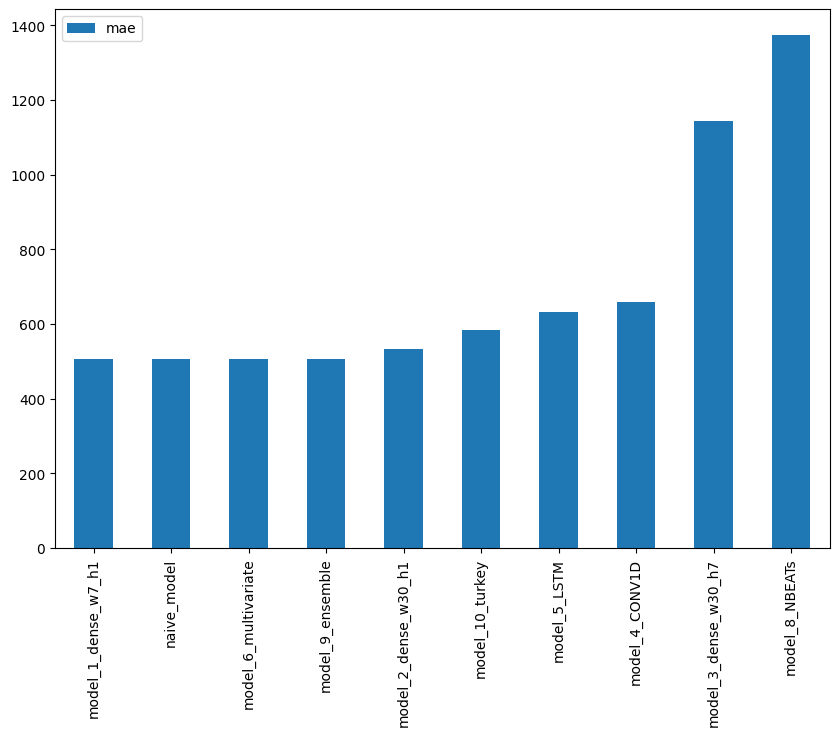

In [152]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");
